# Import and boiler plate code

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch import autograd
import torch.nn.functional as F
import time

Importing and Preparing Data

In [4]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
label_ids,count=np.unique(labels,return_counts=True)
print(label_ids,count)


(array([0, 1, 2, 3, 4], dtype=uint8), array([10000, 10000, 10000, 10000, 10000]))


In [5]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_normal=np.ndarray(shape=shape_images_flat)

# normalizing and flattening images
for index in range(len(images)):
    images_normal[index]=((images[index]-images[index].mean())/images[index].std()).flat

#  braking data set into train,validation and test sets
train_images=images_normal[0:40000]
train_labels=labels[0:40000]

validation_images=images_normal[40000:45000]
validation_labels=labels[40000:45000]

test_images=images_normal[45000:50000]
test_labels=labels[45000:50000]



In [6]:
def accuracy(y, y_hat):
    a=(y==y_hat)
    return a.astype(np.float).mean()

In [7]:
def approx_accuracy(curr_images,curr_labels,length=-1):
    if length==-1:
        length=len(curr_images)
        
    shuffle_list=np.random.choice(len(curr_images), length)
    shuffled_images=curr_images[shuffle_list]
    shuffled_labels=curr_labels[shuffle_list]
    
    x = autograd.Variable(torch.from_numpy(shuffled_images.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(shuffled_labels.astype(np.int)))
    _,y_hat =torch.max(model(x),1)
    # print(y_hat.size())
    return accuracy(y.data.numpy(), y_hat.data.numpy())
         

In [8]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_images[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    
    optimizer.step()
    return loss.data[0]


##  BEST MODEL

In [ ]:
batch_size=60
learning_rate=1e-3
NUM_OPT_STEPS=15000

HEIGHT,WIDTH=26,26
NUM_CLASSES=5
NUM_HIDDEN_UNITS_1=200
NUM_HIDDEN_UNITS_2=100

# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

In [ ]:
class Best_Model(torch.nn.Module):
    def __init__(self):
        super(Best_Model,self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3,stride=1)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.fc1 = torch.nn.Linear( 30976, NUM_HIDDEN_UNITS_1)
        self.fc2 = torch.nn.Linear(NUM_HIDDEN_UNITS_1, NUM_HIDDEN_UNITS_2)
        self.fc3 = torch.nn.Linear(NUM_HIDDEN_UNITS_2, NUM_CLASSES)
        self.drop_1 = torch.nn.Dropout(p=0.7)
    def forward(self, x):
        # Convolutions work with images of shape
        # [batch_size, num_channels, height, width]
        x = x.view(-1, HEIGHT, WIDTH).unsqueeze(1)
      
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        n, c, h, w = x.size()
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x=self.drop_1(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    

In [ ]:
model=Best_Model()
print(model)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)


In [ ]:
train_accs, val_accs = [], [] 
start=time.time()

for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 1000 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
    if i%1000 == 0:
        print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))

end=time.time()
print('Time taken', end-start)

     0  0.24  0.22
  1000  0.92  0.91
  2000  0.94  0.92
  3000  0.93  0.92
  4000  0.95  0.92
  5000  0.95  0.92
  6000  0.96  0.92


  2102  0.98  0.94


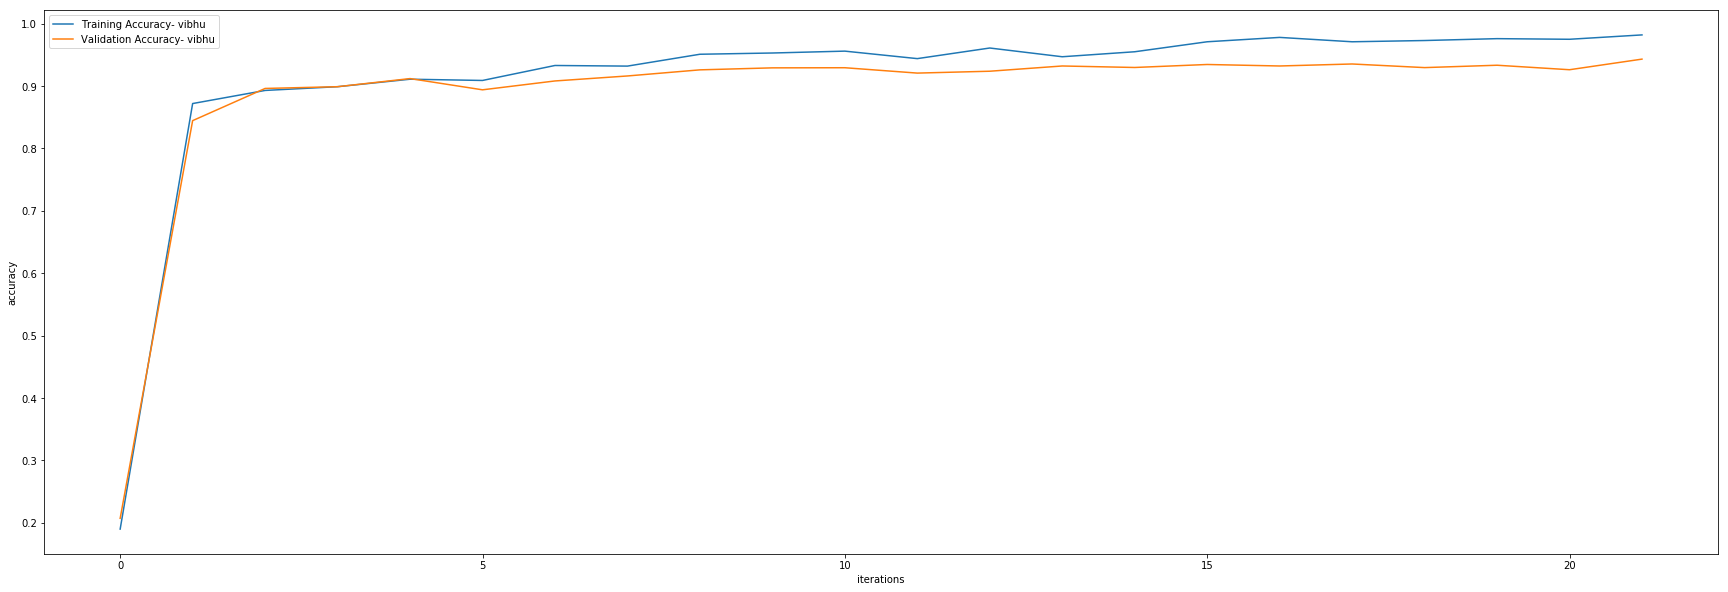

In [45]:
print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy- vibhu ')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy- vibhu')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

In [20]:

images_test_kaggle=np.load('data/part_2_test_images.npy')
shape_images_flat=(images_test_kaggle.shape[0],images_test_kaggle.shape[1]*images_test_kaggle.shape[2])

images_normal=np.ndarray(shape=shape_images_flat)

# normalizing and flattening images
for index in range(len(images_test_kaggle)):
    images_normal[index]=((images[index]-images[index].mean())/images[index].std()).flat


In [21]:
x = autograd.Variable(torch.from_numpy(images_normal.astype(np.float32)))


In [22]:
_,y_hat =torch.max(model(x),1)

In [23]:
pred_numpy=y_hat.data.numpy()
np.savetxt("data/kaggle_pred_2.csv", np.dstack((np.arange(0, pred_numpy.size),pred_numpy))[0],"%d,%d",header="id,label")

In [25]:
train_accs.append(approx_accuracy(train_images,train_labels,1000))
print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


  2037  0.98  0.93


In [26]:
images_test_kaggle=np.load('data/part_2_test_images.npy')
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_normal=np.ndarray(shape=shape_images_flat)

# normalizing and flattening images
for index in range(len(images)):
    images_normal[index]=((images[index]-images[index].mean())/images[index].std()).flat
